In [1]:
import pandas as pd

import numpy as np

import time,datetime

import matplotlib

import matplotlib.pyplot as plt

import seaborn as sns

import calendar

In [2]:
data = pd.read_csv("rideshare_kaggle.csv")

In [3]:
data.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [4]:
extra_cols = [ 'apparentTemperature', 'precipIntensity' ,
'humidity',
'windSpeed',
'apparentTemperatureHigh',
'dewPoint',
'precipIntensityMax',
'apparentTemperatureMax',
'cloudCover',
'moonPhase',
'windGustTime',
'visibility',
'temperatureHighTime' ,
'apparentTemperatureHighTime',
'apparentTemperatureLow' ,
'apparentTemperatureLowTime',
'temperatureMinTime' ,
'temperatureMaxTime',
'apparentTemperatureMin',
'apparentTemperatureMinTime', 'apparentTemperatureMaxTime',
'windBearing' ,
'sunriseTime',
'uvIndex' ,
'visibility.1', 
'ozone',
'sunsetTime', 'uvIndexTime']
data = data.drop(extra_cols, axis = 1)

In [5]:
print(data.isnull().sum())
print(data.isnull().sum().sum())
data=data.dropna()

id                        0
timestamp                 0
hour                      0
day                       0
month                     0
datetime                  0
timezone                  0
source                    0
destination               0
cab_type                  0
product_id                0
name                      0
price                 55095
distance                  0
surge_multiplier          0
latitude                  0
longitude                 0
temperature               0
short_summary             0
long_summary              0
precipProbability         0
windGust                  0
temperatureHigh           0
temperatureLow            0
temperatureLowTime        0
icon                      0
pressure                  0
temperatureMin            0
temperatureMax            0
dtype: int64
55095


Text(0.5, 1.0, 'Number of trips Vs hours')

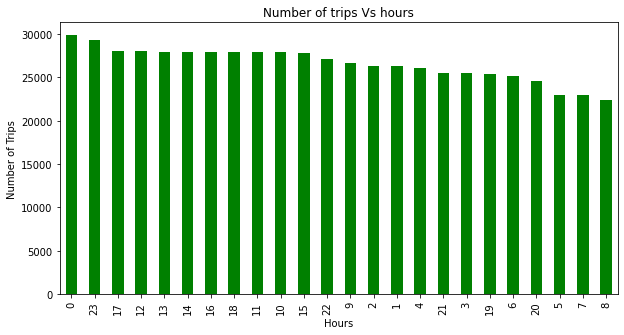

In [6]:
hours = data['hour'].value_counts()
hours.plot(kind= 'bar', color= 'green', figsize= (10,5))
plt.xlabel( 'Hours' )
plt.ylabel( 'Number of Trips' )
plt.title( 'Number of trips Vs hours')

In [7]:
day_week = [calendar.day_name[x.dayofweek] for x in
          pd.to_datetime(data['datetime'], format= "%Y/%m/%d %H:%M:%S")]
day_week = pd.Series(day_week)

Text(0.5, 1.0, 'Number of trips Vs days')

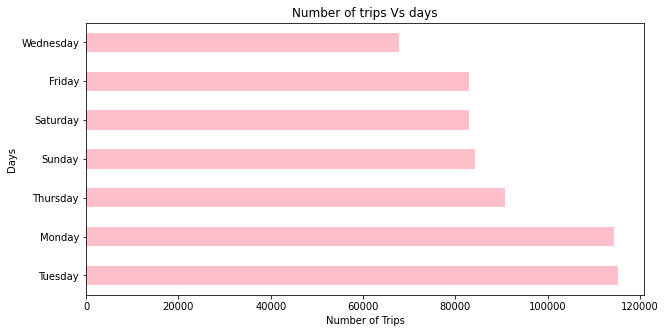

In [8]:
days = day_week.value_counts()
days.plot(kind='barh', color= 'pink', figsize=(10, 5) )
plt.xlabel('Number of Trips')
plt.ylabel('Days' )
plt.title( 'Number of trips Vs days')

Text(0.5, 1.0, 'Number of trips Vs Months')

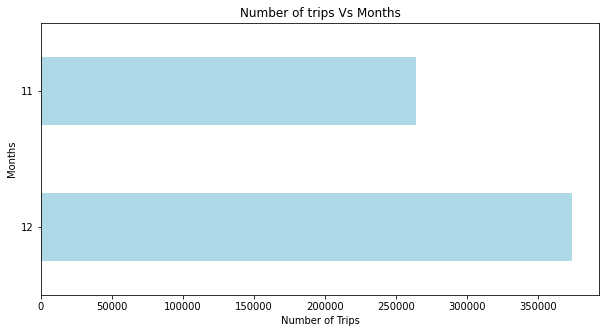

In [9]:
months = data[ 'month' ].value_counts()
months.plot(kind='barh', color= 'lightblue', figsize=(10, 5) )
plt.xlabel('Number of Trips')
plt.ylabel('Months' )
plt.title( 'Number of trips Vs Months')

Text(0.5, 1.0, 'Number of trips Vs days of december')

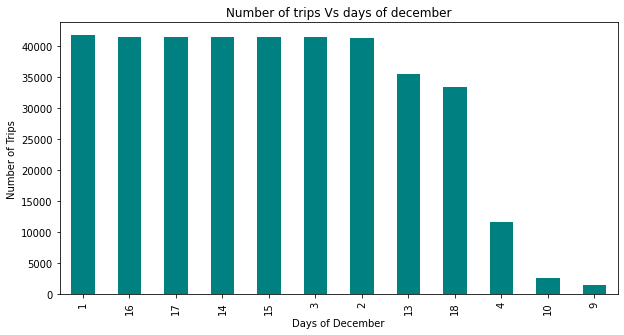

In [10]:
months = data[ 'day' ][data['month']==12].value_counts()
months.plot(kind='bar', color= 'teal', figsize=(10, 5) )
plt.xlabel('Days of December')
plt.ylabel('Number of Trips' )
plt.title( 'Number of trips Vs days of december')

Text(0.5, 1.0, 'Number of Trips by Pickup points')

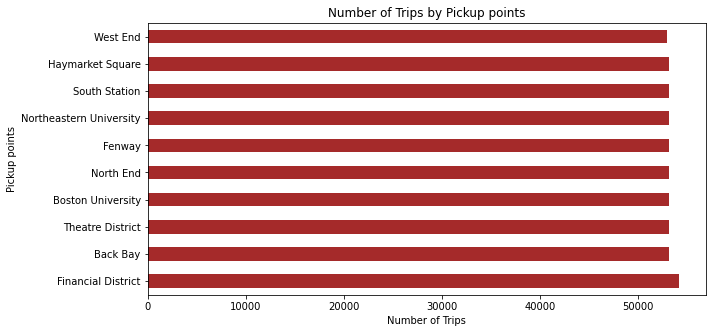

In [11]:
pic_point = data[ 'source' ].value_counts().nlargest(10)
pic_point.plot(kind='barh', color= 'brown', figsize=(10, 5))
plt.xlabel('Number of Trips')
plt.ylabel('Pickup points' )
plt.title( 'Number of Trips by Pickup points')

Text(0.5, 1.0, 'Number of Trips by Drop points')

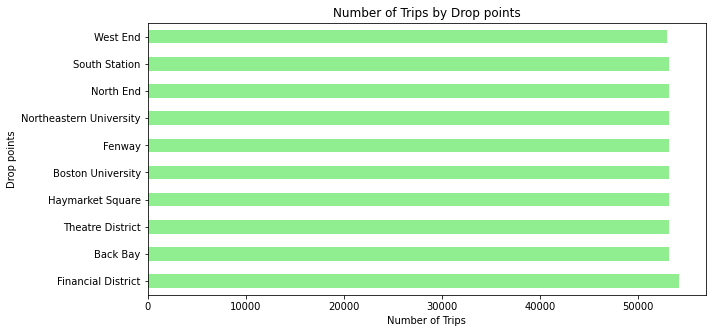

In [12]:
drop_point = data[ 'destination' ].value_counts().nlargest(10)
drop_point.plot(kind='barh', color= 'lightgreen', figsize=(10, 5))
plt.xlabel('Number of Trips')
plt.ylabel('Drop points' )
plt.title( 'Number of Trips by Drop points')

Text(0.5, 1.0, 'points - points Trips Counts')

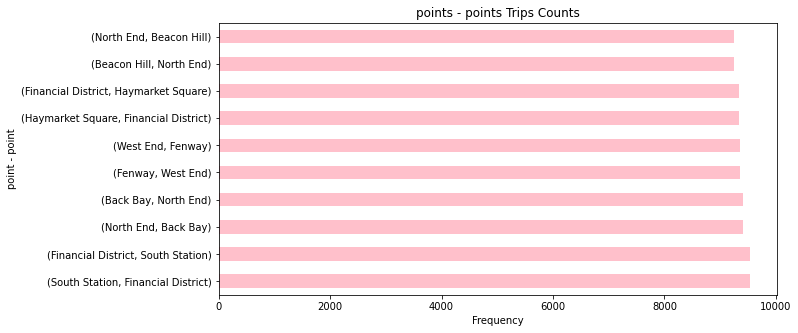

In [13]:
p_p = data[[ 'source', 'destination'] ].value_counts().nlargest(10)
p_p.plot(kind='barh', color= 'pink', figsize=(10, 5))
plt.xlabel('Frequency')
plt.ylabel('point - point' )
plt.title( 'points - points Trips Counts')

Text(0.5, 1.0, 'Number of Trips by Cabs Name ')

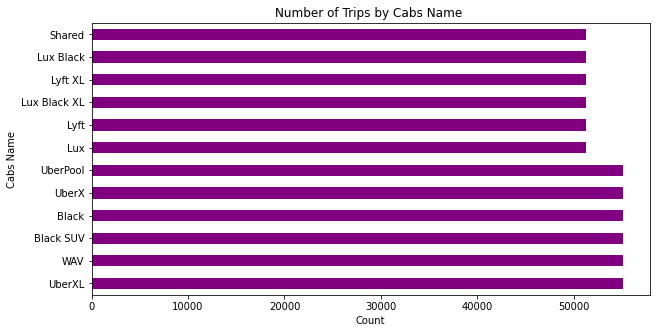

In [14]:
cabs = data['name'].value_counts()
cabs.plot(kind='barh',color='purple',figsize=(10, 5))
plt.xlabel('Count')
plt.ylabel('Cabs Name' )
plt.title( 'Number of Trips by Cabs Name ')

In [15]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [16]:
data['id'] = label_encoder.fit_transform(data['id'])
data['datetime'] = label_encoder.fit_transform(data['datetime'])
data['timezone'] = label_encoder.fit_transform(data['timezone'])
data['destination'] = label_encoder.fit_transform(data['destination'])
data['product_id'] = label_encoder.fit_transform(data['product_id'])
data['short_summary'] = label_encoder.fit_transform(data['short_summary'])
data['long_summary'] = label_encoder.fit_transform(data['long_summary'])
data['name'] = label_encoder.fit_transform(data['name'])

In [17]:
print("Class mapping of Name: ")
for i, item in enumerate(label_encoder.classes_):
    print(item, "-->", i)

Class mapping of Name: 
Black --> 0
Black SUV --> 1
Lux --> 2
Lux Black --> 3
Lux Black XL --> 4
Lyft --> 5
Lyft XL --> 6
Shared --> 7
UberPool --> 8
UberX --> 9
UberXL --> 10
WAV --> 11


In [18]:
data['source'] = label_encoder.fit_transform(data['source'])

print("Class mapping of Source: ")
for i, item in enumerate(label_encoder.classes_):
    print(item, "-->", i)

Class mapping of Source: 
Back Bay --> 0
Beacon Hill --> 1
Boston University --> 2
Fenway --> 3
Financial District --> 4
Haymarket Square --> 5
North End --> 6
North Station --> 7
Northeastern University --> 8
South Station --> 9
Theatre District --> 10
West End --> 11


In [19]:
data['icon'] = label_encoder.fit_transform(data['icon'])

print("Class mapping of Icon: ")
for i, item in enumerate(label_encoder.classes_):
    print(item, "-->", i)

Class mapping of Icon: 
 clear-day  --> 0
 clear-night  --> 1
 cloudy  --> 2
 fog  --> 3
 partly-cloudy-day  --> 4
 partly-cloudy-night  --> 5
 rain  --> 6


In [20]:
data['cab_type'] = label_encoder.fit_transform(data['cab_type'])

print("Class mapping of Cabe_type: ")
for i, item in enumerate(label_encoder.classes_):
    print(item, "-->", i)

Class mapping of Cabe_type: 
Lyft --> 0
Uber --> 1


In [21]:
x = data[data['cab_type']==1].drop(['price', 'cab_type'], axis=1)
y = data[data['cab_type']==1]['price']

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)

In [23]:
from   sklearn.feature_selection   import   RFE
from   sklearn.linear_model   import   LinearRegression
from   sklearn.tree   import   DecisionTreeRegressor
from   sklearn.ensemble   import   RandomForestRegressor


from   sklearn   import  ensemble
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [24]:
def train_test_models(x_train, y_train, x_test, y_test):
    print("Linear Regression... ")
    lr_model = LinearRegression()
    lr_model = lr_model.fit(x_train,  y_train)
    print(lr_model.score(x_test,  y_test))
    
    
    print("Decision Tree... ")
    dt_model = DecisionTreeRegressor(random_state = 0, max_depth = 10)
    dt_model.fit(x_train,  y_train)
    print(dt_model.score(x_test,  y_test)) 
    
    
    print("Random Forest... ")
    rf_model = RandomForestRegressor(n_estimators = 20, random_state = 0)
    rf_model.fit(x_train,  y_train)
    print(rf_model.score(x_test,  y_test)) 
    
    return [lr_model, dt_model, rf_model]

In [25]:
def feature_eliminate(trained_model, x, y, n_features=40):
    rfe = RFE(trained_model, n_features_to_select=n_features)
    rfe = rfe.fit(x, y)
    x_new = x[x.columns[rfe.support_]]
    x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size = 0.2, random_state = 0)
    new_fit = trained_model.fit(x_train, y_train)
    print(new_fit.score(x_test, y_test))

In [26]:
train_test_models(x_train, y_train, x_test, y_test)

Linear Regression... 
0.652459104165956
Decision Tree... 
0.9485131391462979
Random Forest... 
0.9419807235622679


[LinearRegression(),
 DecisionTreeRegressor(max_depth=10, random_state=0),
 RandomForestRegressor(n_estimators=20, random_state=0)]

In [27]:
dt_model = DecisionTreeRegressor(random_state=0, max_depth=10)
dt_model.fit(x_train, y_train)

# Make predictions
y_pred = dt_model.predict(x_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')
print(f'R^2 Score: {r2:.2f}')


Mean Squared Error: 3.73
Mean Absolute Error: 1.17
R^2 Score: 0.95


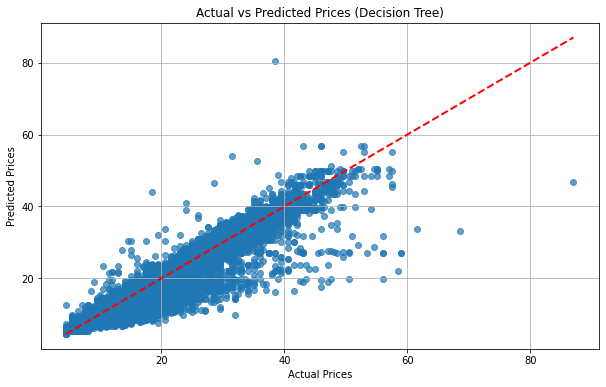

In [28]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs Predicted Prices (Decision Tree)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.grid()
plt.show()


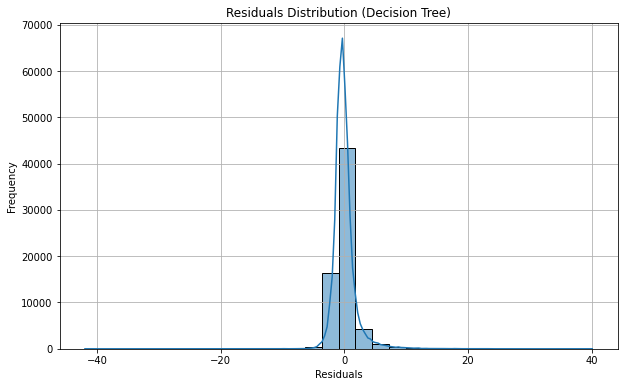

In [29]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.title('Residuals Distribution (Decision Tree)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid()
plt.show()


In [30]:
threshold = 5
predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
predictions_df['Difference'] = predictions_df['Actual'] - predictions_df['Predicted']
predictions_df['Correct'] = np.where(predictions_df['Difference'].abs() <= threshold, 'TP/TN', 'FP/FN')

# Count TP, TN, FP, FN
TP = np.sum((predictions_df['Difference'] <= threshold) & (predictions_df['Difference'] >= -threshold))
TN = 0  # In this regression context, TN is usually not defined
FP = np.sum(predictions_df['Difference'] > threshold)
FN = np.sum(predictions_df['Difference'] < -threshold)

# Create a DataFrame for TP, TN, FP, FN
confusion_counts = pd.Series({'True Positives': TP, 'True Negatives': TN, 'False Positives': FP, 'False Negatives': FN})


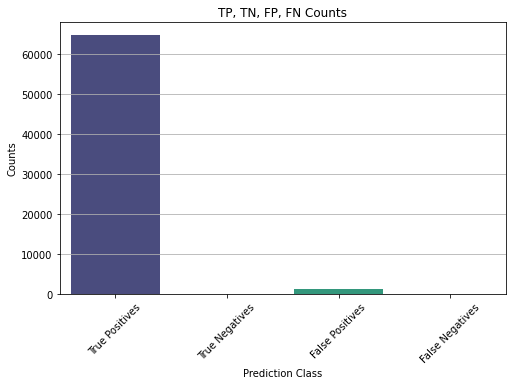

In [31]:
# Plot TP, TN, FP, FN
plt.figure(figsize=(8, 5))
sns.barplot(x=confusion_counts.index, y=confusion_counts.values, palette='viridis')
plt.title('TP, TN, FP, FN Counts')
plt.ylabel('Counts')
plt.xlabel('Prediction Class')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


source_mapping = {name: idx for idx, name in enumerate(data['source'].unique())}
destination_mapping = {name: idx for idx, name in enumerate(data['destination'].unique())}
cab_type_mapping = {name: idx for idx, name in enumerate(data['cab_type'].unique())}

# Convert categorical columns to numeric using the mapping
data['source'] = data['source'].map(source_mapping)
data['destination'] = data['destination'].map(destination_mapping)
data['cab_type'] = data['cab_type'].map(cab_type_mapping)

# Prepare features and target
x = data.drop(['price'], axis=1)  # Adjust to drop appropriate features
y = data['price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Train the model
rf_model = RandomForestRegressor(n_estimators=20, random_state=0)
rf_model.fit(x_train, y_train)



Mean Squared Error: 3.18
Mean Absolute Error: 1.14
R^2 Score: 0.96


In [33]:
# Check model performance
y_pred = rf_model.predict(x_test)
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}')
print(f'Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.2f}')
print(f'R^2 Score: {r2_score(y_test, y_pred):.2f}')

# User input for prediction
# Assuming valid values have been pre-defined
valid_sources = list(source_mapping.keys())
valid_destinations = list(destination_mapping.keys())
valid_cab_types = list(cab_type_mapping.keys())

# Get user input
source_input = input("Enter source (e.g., Back Bay): ")
if source_input not in valid_sources:
    print(f"Error: '{source_input}' is not a valid source. Please choose from: {valid_sources}")
    exit()

destination_input = input("Enter destination (e.g., Destination 1): ")
if destination_input not in valid_destinations:
    print(f"Error: '{destination_input}' is not a valid destination. Please choose from: {valid_destinations}")
    exit()

cab_type_input = input("Enter cab type (e.g., UberX): ")
if cab_type_input not in valid_cab_types:
    print(f"Error: '{cab_type_input}' is not a valid cab type. Please choose from: {valid_cab_types}")
    exit()

hour_input = int(input("Enter hour of the ride (1-24): "))
if hour_input < 1 or hour_input > 24:
    print("Error: Hour must be between 1 and 24.")
    exit()

# Prepare the input data for prediction
input_data = pd.DataFrame({
    'source': [source_mapping[source_input]],  # Encode using mapping
    'destination': [destination_mapping[destination_input]],  # Encode destination
    'cab_type': [cab_type_mapping[cab_type_input]],  # Encode cab type
    'hour': [hour_input]
})

# Make the prediction
predicted_price = rf_model.predict(input_data)
print(f"Predicted price: {predicted_price[0]:.2f}")


Enter source (e.g., Back Bay): Haymarket Square
Enter destination (e.g., Destination 1): North Station
Enter cab type (e.g., UberX): Shared
Enter hour of the ride (1-24): 9


C:\Users\harit\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names seen at fit time, yet now missing:
- datetime
- day
- distance
- icon
- id
- ...

  warnings.warn(message, FutureWarning)


ValueError: could not convert string to float: 'Haymarket Square'